# Amazon Reviews - NLP - Sentiment Analysis - Text Mining - Deep Learning

<img src="wordcloud_amazon.png" >

### Import Packages

In [33]:
import os
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 300)

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import html
import re
import neattext.functions as nfx
from langdetect import detect_langs
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.util import ngrams
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### Import Data

<h4 align="center" id="Datasets">Datasets</h4>

The [Amazon dataset](http://jmcauley.ucsd.edu/data/amazon/index.html) contains the customer reviews for all listed *Electronics* products spanning from May 1996 up to July 2014. There are a total of 1,689,188 reviews by a total of 192,403 customers on 63,001 unique products. The data dictionary is as follows:

*  **asin** - Unique ID of the product being reviewed, *string*
*  **helpful** - A list with two elements: the number of users that voted *helpful*, and the total number of users that voted on the review (including the *not helpful* votes), *list*
*  **overall** - The reviewer's rating of the product, *int64*
*  **reviewText** - The review text itself, *string*
*  **reviewerID** - Unique ID of the reviewer, *string*
*  **reviewerName** - Specified name of the reviewer, *string*
*  **summary** - Headline summary of the review, *string*
*  **unixReviewTime** - Unix Time of when the review was posted, *string*

In [ ]:
dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]","We got this GPS for my husband who is an (OTR) over the road trucker. Very Impressed with the shipping time, it arrived a few days earlier than expected... within a week of use however it started freezing up... could of just been a glitch in that unit. Worked great when it worked! Will work ...",5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bought a TND 700 at a truck stop hoping to make my life easier. Rand McNally, are you listening?First thing I did after charging it was connect it to my laptop and install the software and then attempt to update it. The software detected a problem wit...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in my truck for about four days now. Prior to that I had a Garmin 755T non-truck GPS. One of my favorite features in that unit was the ability to plan a route by determining mileage using the stop or via feature. What I would do is using a map I would...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought this unit deserves one. I've driven well over 1-mil miles and done most of my own routing so I pretty know whats the fastest and shortest. Have been using a basic garmin for the past three years and with ANY Gps unit they'll ALL get you in trouble i...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we got. It tries to route be down non truck routes while telling me the truck route is illegal for me. This is such a bad problem that even Interstate 25 in Denver Colorado is listed (according to this GPS) as a non- truck route and will route you through...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as described. The HD picture on my Samsung 52&#34; TV is excellent.,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconnects itself.The price is completely unfair and only works with the Nook HD and HD+,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]","This adaptor is real easy to setup and use right out of the box. I had not problem with it at all, it is well worth the purchase. I recommend this adaptor very much for viewing your Nook videos on your HDTV. I just disagree with other reviews on the length of the adaptor, I found it to be fairly...",5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]","This adapter easily connects my Nook HD 7&#34; to my HDTV through the HDMI cable. This is good for traveling because it makes any hotel TV a potential smart TV so long as there is an accessible HDMI port. It is also good for sharing photos from FB on a bigger screen. A bit pricey, but a good a...",4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found the following items you need to keep in mind:- You must have your power adapter connected for it to work...it plugs in the the bottom. It appears it needs power from the nook power adapter to operate.- The plug fits in loosely and you cannot move the N...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [ ]:
df.to_csv("amazon.csv")

In [ ]:
#df = pd.read_csv("/content/amazon.csv")

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [ ]:
df.shape

(1689188, 9)

In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,24730
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
df["reviewTime"] = pd.to_datetime(df["reviewTime"])

In [ ]:
df.sample(4)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
672616,ACBBT4Y7S7MBZ,B002VPE1XE,Angela Gant,"[0, 0]","Normally I hate generic cases, but this one is great. It's well constructed. I could see how it would fit most cameras, storage for charger, and other digital goodies. It's compact and lightweight.",5,"Normally I hate generic cases, but this one is great",1354233600,2012-11-30
1014156,A1UNIHKR24SM3X,B004RORMF6,NaN,"[0, 3]",This most likely has been mentioned in other reviews. But for prospective purchasers - one VERY big caveat. This drive will not be recognized by Win XP 64 as a 3Tb drive. It shows up as about 760Gb due to the 2Tb size restriction of this OS.Apparently if you download a 3rd party device driver (b...,2,Not compatible with Windows XP 64 Pro,1335830400,2012-05-01
1505851,A3QEFNG2Y3ETW9,B009ZNSI48,Macon Parrot Heads,"[14, 14]","I received this today and I am tickled with my purchase!! I got the white one to protect my new white iPad Mini. It fits perfectly, well made, convenient stand and whoever thought of the stylus holder was a genius. The price is terrific. All power and volume buttons are easy to access. The ...",5,Exactly what I was looking for!!!,1353974400,2012-11-27
791099,A2JL7G6A66ADZG,B003LPTAYI,Our Gun,"[0, 0]","I'm sorry, but for under 20 bucks these are the best sounding headphones I've ever heard. Like any over the ear headphone, they take a bit of getting used to, and after 3 hours they start to bother your ears a little bit, but you shouldn't listen to music on headphones or earbuds for super long...",5,They're practically giving them away.,1327795200,2012-01-29


In [ ]:
df.overall.unique()

array([5, 1, 3, 2, 4])

In [ ]:
counts = df['overall'].value_counts().sort_index()
ratios = df['overall'].value_counts(normalize=True).sort_index().round(2)

In [ ]:
counts , ratios

(overall
 1     108725
 2      82139
 3     142257
 4     347041
 5    1009026
 Name: count, dtype: int64,
 overall
 1    0.06
 2    0.05
 3    0.08
 4    0.21
 5    0.60
 Name: proportion, dtype: float64)

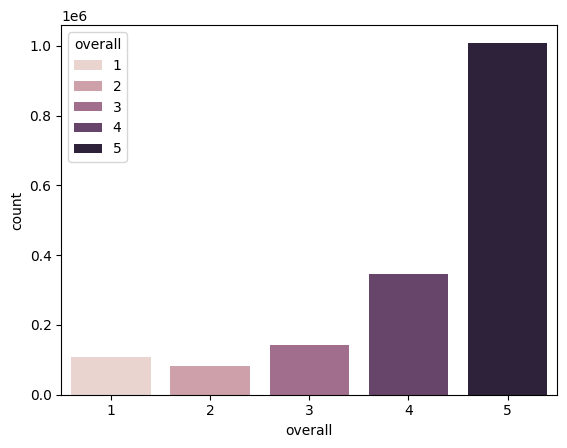

In [ ]:
sns.countplot(x=df["overall"], hue=df["overall"]);

In [ ]:
pd.set_option("display.max_colwidth", None)
df["reviewText"].sample(7, random_state=88)

,reviewText
1044241,"Great upgrade to old DOCSIS 2.0 D-link modem. Setup in minutes, works great with Time Warner and Belkin router. Highly recommend it."
128422,The idea and size of the SanDisk is great but the control toggle is just to small. When trying to scroll through songs I would skip to the radio or another folder. The sound quality was great and creating folders and transfering music was easy. Although the files did not always transfer in the order of the playlist. I returned and guess I will have to save up for an Ipod.
763094,"Use this drive to backup and store offline files for my Apple Mac computers. I have formatted the drive to be Mac Extended File System (Journaled). I have connected to it using both firewire 800 and USB 2. Getting great bandwidth (sustained performance for backup). The design is solid and very rugged. You can travel the world with this drive without worries. I have been around the world a few times, literally, and it has never failed me."
376287,"The original battery in my plantronics headset wasn't holding much of a charge after 5+ years, to the point where it would no longer work through a 1 hour call (much less the 2 + hour calls I occasionally find myself on).This new battery was easy to install and has yet to stop working for me as long as I remember to charge it each night when I go home.I'll update this review if I run into issues or if it stops working for long calls in the next year or so."
1671007,"Not that its a good bench mark, but plays Minecraft @ almost 300fps at best setting on 1080p with AtLauncher for Sky Factory.System (for those that want a quick list of what works well together)-BenQ VA GW2750HM-Corsair Vengeance Computer Case (CC-9011018-WW)-Corsair CX750M750 Watt Power Supply-Corsair Vengeance Memory 16GB (CMZ16GX3M2A1600C10)-ASUS M5A99FX PRO R2.0 Motherboard-AMD CPU FD6300WMHKBOX FX-6300 6-Core Black Edition-MSI R9 270 2G Graphics Card-Toshiba 2.0TB Bare Drive PH3200U-1I72-Windows 8.1 System Builder OEM DVD 64-Bit"
1415675,Really like this card reader so far. It fits all cards and I will be using it a lot. I use micro SD in my phone and regular SD for a photo frame. Like having this one reader instead of having to use adapters. Thank you
721966,"Pro:1. Image quality - high contrast, evenly bright, pop out color, almost 180 degree view angel without fatigue. My TV faces hugh windows and I have no problem watching TV during the day!2. Thin frame (and therefore looks smaller), super slim (thanks to LED), and FEATHER LIGHT! Ok, so maybe I exaagerated a bit. But at 30lb it's less than half of the weight of the same sized regular LCD/Plasma TVs. I single handedly handle it without problem - setting it up on a wall mounting bracket.3. Solid build quality through out - wire connectors, frames, display panel, stands, remote control.Con:The price. At $1200 + tax/fees, I can get 2 same sized HDTV. But the difference in quality is quite visible in every way. But still, I deducted 1 star for my own ""cheapness"". My apology:)As a late comer straight from the good old tube world, this set makes my old DVDs look better than ever. Yes, blue ray is even better. But wow, I never thought my DVDs are this good in all these years!By the way, while I was debating which set to take home in the local store the other day, I made a point to stare at the similar sized Sony set a while longer - the King of the TV land. Honestly, I think Samsung is better, at least according to my pair of humble eyes. Sorry Sony. Time indeed has changed!"


### Clean Text

In [ ]:
# HTML entity'lerini temizleyelim
df["reviewText"] = df["reviewText"].apply(lambda x: html.unescape(x) if isinstance(x, str) else x)

In [ ]:
def cleaner_func(text):
    if not isinstance(text, str):  # Eğer metin değilse, boş string döndür
        return ""

    text = text.lower()  # Küçük harfe çevir

    # URL'leri ve bölünmüş URL kalıntılarını kaldır
    text = re.sub(r"http\S+|www\S+|https\S+|amazon\S+|com", "", text)

    # E-posta adreslerini kaldır
    text = re.sub(r"\S+@\S+", "", text)

    # @kullanıcı adlarını kaldır
    text = re.sub(r"@\w+", "", text)

    # #hashtag'leri kaldır
    text = re.sub(r"#\w+", "", text)

    # Teknik kalıntı ID'leri kaldır (örnek: sr, utf, dp, bzmfg, ie)
    text = re.sub(r"\b(sr|utf|dp|bzmfg|ie)\b", "", text)

    # Özel karakterleri ve noktalama işaretlerini kaldır
    text = nfx.remove_special_characters(text)
    text = nfx.remove_numbers(text)
    text = nfx.remove_punctuations(text)

    # Tek harfli kelimeleri kaldır (örn. "s", "m", "i")
    text = re.sub(r"\b\w\b", "", text)

    # Fazla boşlukları temizle
    text = re.sub(r"\s+", " ", text).strip()

    return text


In [ ]:
df["text"] = df["reviewText"].apply(cleaner_func)

In [ ]:
df["text"].sample(7, random_state=88)

,text
1044241,great upgrade to old docsis dlink modem setup in minutes works great with time warner and belkin router highly remend it
128422,the idea and size of the sandisk is great but the control toggle is just to small when trying to scroll through songs would skip to the radio or another folder the sound quality was great and creating folders and transfering music was easy although the files did not always transfer in the order of the playlist returned and guess will have to save up for an ipod
763094,use this drive to backup and store offline files for my apple mac puters have formatted the drive to be mac extended file system journaled have connected to it using both firewire and usb getting great bandwidth sustained performance for backup the design is solid and very rugged you can travel the world with this drive without worries have been around the world few times literally and it has never failed me
376287,the original battery in my plantronics headset wasnt holding much of charge after years to the point where it would no longer work through hour call much less the hour calls occasionally find myself onthis new battery was easy to install and has yet to stop working for me as long as remember to charge it each night when go homeill update this review if run into issues or if it stops working for long calls in the next year or so
1671007,not that its good bench mark but plays minecraft almost fps at best setting on with atlauncher for sky factorysystem for those that want quick list of what works well togetherbenq va gwhmcorsair vengeance puter case ccwwcorsair cxm watt power supplycorsair vengeance memory gb cmzgxmacasus mafx pro motherboardamd cpu fdwmhkbox fx core black editionmsi graphics cardtoshiba tb bare drive phuiwindows system builder oem dvd bit
1415675,really like this card reader so far it fits all cards and will be using it lot use micro sd in my phone and regular sd for photo frame like having this one reader instead of having to use adapters thank you
721966,pro image quality high contrast evenly bright pop out color almost degree view angel without fatigue my tv faces hugh windows and have no problem watching tv during the day thin frame and therefore looks smaller super slim thanks to led and feather light ok so maybe exaagerated bit but at lb its less than half of the weight of the same sized regular lcdplasma tvs single handedly handle it without problem setting it up on wall mounting bracket solid build quality through out wire connectors frames display panel stands remote controlconthe price at taxfees can get same sized hdtv but the difference in quality is quite visible in every way but still deducted star for my own cheapness my apologyas late er straight from the good old tube world this set makes my old dvds look better than ever yes blue ray is even better but wow never thought my dvds are this good in all these yearsby the way while was debating which set to take home in the local store the other day made point to stare at the similar sized sony set while longer the king of the tv land honestly think samsung is better at least according to my pair of humble eyes sorry sony time indeed has changed


In [ ]:
df.to_csv("cleaned.csv")

### Detect Language

In [ ]:
def detect_language_safe(text):
    try:
        return str(detect_langs(text)[0]).split(':')[0]
    except:
        return "unknown"

# Uygula
df["language"] = df["text"].apply(detect_language_safe)

In [ ]:
df['language'].value_counts()

,count
language,
en,1683478
es,1995
unknown,1091
af,838
ro,283
ca,223
so,159
pt,136
fr,104


İngilizce olan verilerle devam ediyoruz

In [ ]:
df=df[df['language']=='en']

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.to_csv("en_data.csv")

### Remove Stopwords

In [ ]:
# Stopwords'leri kaldırıyoruz
df["text"] = df["text"].apply(nfx.remove_stopwords)

### Lemmatization - find root

In [ ]:
#NLTK'nin verdiği ayrıntılı POS etiketlerini (örneğin: JJ, VBG, NNS) WordNet lemmatizer'ın anlayabileceği biçime (ADJ, VERB, NOUN, ADV) dönüştürüyoruz.
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ  # Sıfat
    elif treebank_tag.startswith('V'):
        return wordnet.VERB  # Fiil
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN  # İsim
    elif treebank_tag.startswith('R'):
        return wordnet.ADV  # Zarf
    else:
        return wordnet.NOUN  # Varsayılan olarak isim al

In [ ]:
# Verilen metni tokenize eder, her kelimenin POS (sözcük türü) etiketini belirler,
# ardından WordNet lemmatizer ile her kelimeyi doğru tür bilgisiyle lemmatize eder (kök haline getirir)
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return " ".join(lemmatized)

In [ ]:
df["text"].sample(7, random_state=8)

,text
57350,travel ton wanted portable camera high resolution originally bought konica kz megapixels found focusing problematic things swaped canon canon introduced model swaped didnt use sin short couldnt happier thing looks great super portable takes wonderful pictures ive printed xs use automatic setting great job photographers appreciate manual controls white balance iso speed etcwith megapixels features camera offers doubt model outdated anytime soon priced high end peer group cant saving money justify passing dont word look reviews
740895,ive dropped item countless times continues work skeptical owing portable hard drive years amazing
606219,logically like drawing power devices reduce power device thats assumption nonetheless ir devices shine ir light needs product good choice kept utilize wall wart
1008641,able work correctly failed electronic tricks assumed fault reviews people units didnt work easier hadnt device cloudinitially confused device cloud deal actually physical drive dont worry accessing data storage proper devices backed storage drives clouds amazon itunes collect data want toif network home able access cloud things doesnt necessarily sense cloud dependent electricity internet viable
952040,switches like wingding font mode play works
1189678,second anker astro mini ive ordered christmas present teen daughter borrowing times ordered purse worry phone going dead recent conference charged phone colleagues wasnt dead great item price packaging nice
434439,let lessthanperfect stuff way zoom range optical viewfinder lens cap builtin know bad stuff raveinstead rave ill leave important thought takes excellent pictures leica lens wide aperture ccd work lighting conditions promise panasonics marketing materials deliberately held raising pixel count opting instead push quality delivered carry lx im shooting seriously hang sony alpha mm neck cameras perfectly plimentaryi happy purchase past months


In [ ]:
df["text"] = df["text"].apply(lemmatize_text)

In [ ]:
df["text"].sample(7, random_state=8)

,text
57350,travel ton want portable camera high resolution originally buy konica kz megapixels find focus problematic thing swap canon canon introduce model swap didnt use sin short couldnt happier thing look great super portable take wonderful picture ive print xs use automatic setting great job photographer appreciate manual control white balance iso speed etcwith megapixels feature camera offer doubt model outdated anytime soon price high end peer group cant save money justify pass dont word look review
740895,ive drop item countless time continue work skeptical owe portable hard drive year amaze
606219,logically like draw power device reduce power device thats assumption nonetheless ir device shine ir light need product good choice keep utilize wall wart
1008641,able work correctly fail electronic trick assume fault review people unit didnt work easier hadnt device cloudinitially confused device cloud deal actually physical drive dont worry access data storage proper device back storage drive cloud amazon itunes collect data want toif network home able access cloud thing doesnt necessarily sense cloud dependent electricity internet viable
952040,switch like wingding font mode play work
1189678,second anker astro mini ive order christmas present teen daughter borrow time order purse worry phone go dead recent conference charge phone colleague wasnt dead great item price packaging nice
434439,let lessthanperfect stuff way zoom range optical viewfinder lens cap builtin know bad stuff raveinstead rave ill leave important thought take excellent picture leica lens wide aperture ccd work light condition promise panasonics market material deliberately hold raise pixel count opt instead push quality deliver carry lx im shoot seriously hang sony alpha mm neck camera perfectly plimentaryi happy purchase past month


In [ ]:
pd.set_option("display.max_colwidth", 100)

In [ ]:
df.sample(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,text,language
16704,A1256VJWFLG3P6,B0000510ZO,Justin L. Phillips,"[0, 0]","Not much to say, it's a very short power cable. I bought it for a printer, but it wasn't really ...",3,It is what it is,1378684800,2013-09-09,short power cable buy printer wasnt long purpose,en
579219,A3SABXA4IMETF0,B002BH3Z8E,Kory Kinnett,"[0, 0]",Is a bit on the bulkier side of height... and the width broke my quick clips on my coolermaster ...,5,Works great,1365465600,2013-04-09,bit bulky height width break quick clip coolermaster haf work bit snugg id remend,en
1574725,AVU1ILDDYW301,B00C0T7IP4,G. Hearn,"[3, 5]","I had high hopes for this item, but it didn't go well from the start. As it says in the informa...",2,Probably NOT what you're looking for. . . . .,1374624000,2013-07-24,high hope item didnt start say information send device hearing aid problem hear need contact doc...,en


In [ ]:
df.to_csv("lemmatized.csv")

### Phrase Modeling

In [ ]:
# Unigram, Bigram ve Trigram saklamak için listeler
all_unigrams = []
all_bigrams = []
all_trigrams = []


for row in df["text"]:
    tokens = word_tokenize(row.lower())


    all_unigrams.extend(ngrams(tokens, 1))
    all_bigrams.extend(ngrams(tokens, 2))
    all_trigrams.extend(ngrams(tokens, 3))

In [ ]:
unigram_freq = Counter(all_unigrams)
bigram_freq = Counter(all_bigrams)
trigram_freq = Counter(all_trigrams)

In [ ]:
def visualize_ngram(counter, title, n=20):

    top_n = counter.most_common(n)
    df_top = pd.DataFrame(top_n, columns=["ngram", "count"])
    df_top["ngram"] = df_top["ngram"].apply(lambda x: ' '.join(x))

    plt.figure(figsize=(8, 6))
    sns.barplot(x="count", y="ngram", data=df_top, palette="Set2")
    plt.title(f"{title}")
    plt.tight_layout()
    plt.show()

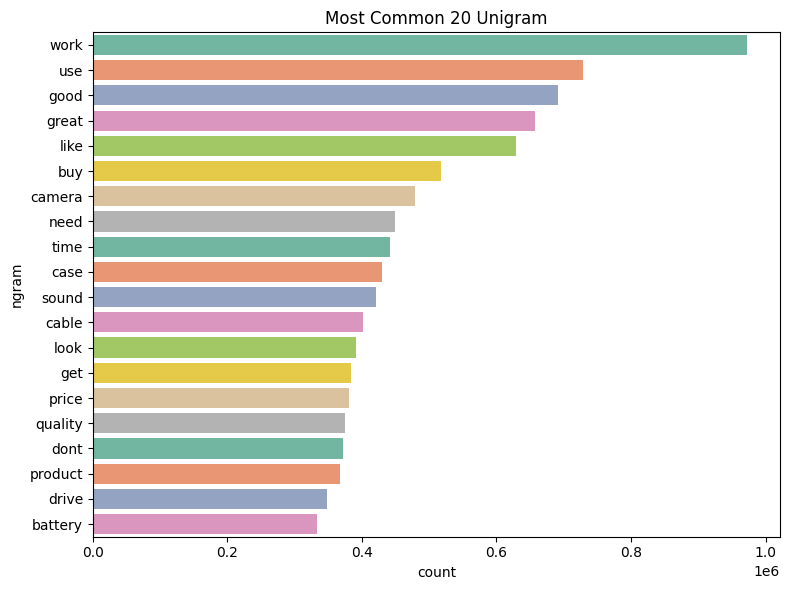

In [ ]:
visualize_ngram(unigram_freq, "Most Common 20 Unigram")

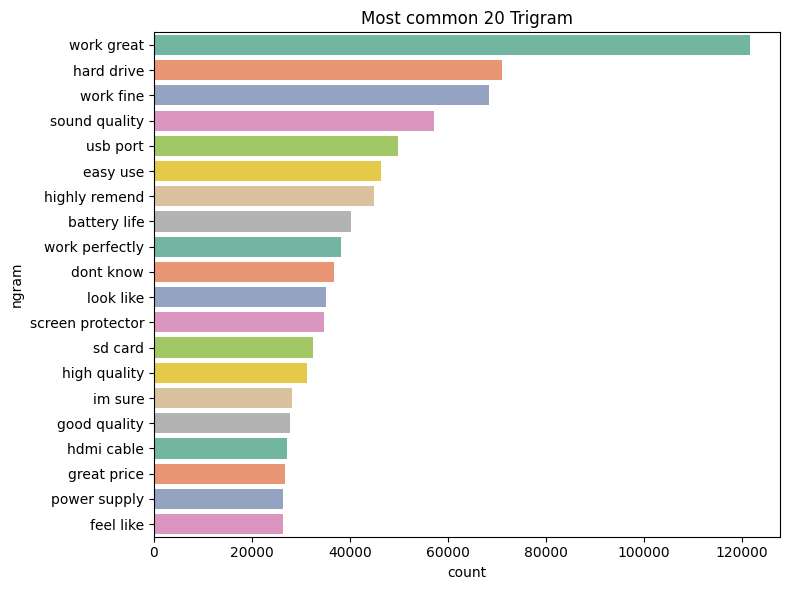

In [ ]:
visualize_ngram(bigram_freq, "Most common 20 Trigram")

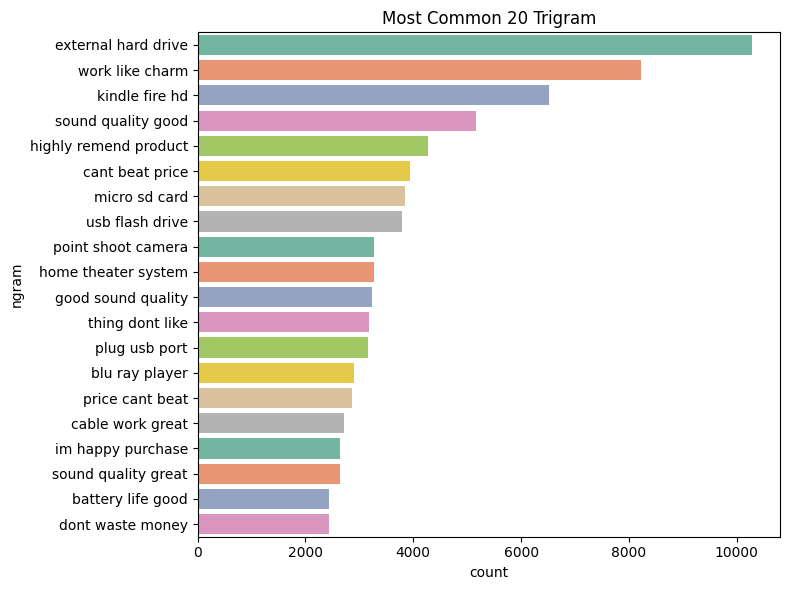

In [ ]:
visualize_ngram(trigram_freq, "Most Common 20 Trigram")

In [ ]:
pd.set_option("display.max_colwidth", 60)

In [ ]:
df.value_counts("overall")

,count
overall,
5,1005096
4,346060
3,141924
1,108435
2,81963


### Vader Sentiment Analysis

In [ ]:
sia = SentimentIntensityAnalyzer()
sentiment_scores = df['text'].apply(lambda x: sia.polarity_scores(str(x)))

In [ ]:
df['neg'] = sentiment_scores.apply(lambda x: x['neg'])
df['neu'] = sentiment_scores.apply(lambda x: x['neu'])
df['pos'] = sentiment_scores.apply(lambda x: x['pos'])
df['compound'] = sentiment_scores.apply(lambda x: x['compound'])

In [ ]:
df['compound'].describe()

,compound
count,1.683478e+06
mean,5.782302e-01
std,4.647529e-01
min,-9.991000e-01
25%,3.975000e-01
50%,7.717000e-01
75%,9.207000e-01
max,1.000000e+00


In [ ]:
#compound skoruna göre pozitif, negatif veya nötr
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >= 0.2 else ('negative' if x <= -0.2 else 'neutral'))

In [ ]:
df.sample(4)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,text,language,neg,neu,pos,compound,sentiment
78012,A2FCYHEV5DWT41,B0000BZL5A,Tri Sanguanbun,"[0, 0]",I'd recommend this to anyone who's looking to take lands...,5,Awesome filter!,1380844800,2013-10-04,id remend who look landscape photo go yellowstone trip m...,en,0.00,0.717,0.283,0.7430,positive
1097193,A3R5H1C29XBGMW,B005BDAR5E,Robert S. Wolfarth,"[0, 0]",Good product at a very reasonable price. Nice add on to...,5,Nice,1356566400,2012-12-27,good product reasonable price nice add protect end lens ...,en,0.00,0.491,0.509,0.8074,positive
1428255,A2SWJU84QGS9U2,B008YZ8T92,Alfredo J.,"[0, 1]",I LOVED the case and how slim it kept my mini! Sadly th...,3,Loved the case,1388448000,2013-12-31,love case slim keep mini sadly clip brike hr sad plan bu...,en,0.28,0.521,0.199,-0.1779,neutral
373010,A2T2V2N67ECW6G,B00139U5D4,Brian Crocker,"[1, 1]",for 1.3b advertised certified this is the cheapest 15 or...,5,good hdmi cable,1218499200,2008-08-12,advertise certified cheapest ft hdmi cable find bought w...,en,0.00,0.806,0.194,0.6249,positive


In [ ]:
df.value_counts("sentiment")

,count
sentiment,
positive,1368738
neutral,157917
negative,156823


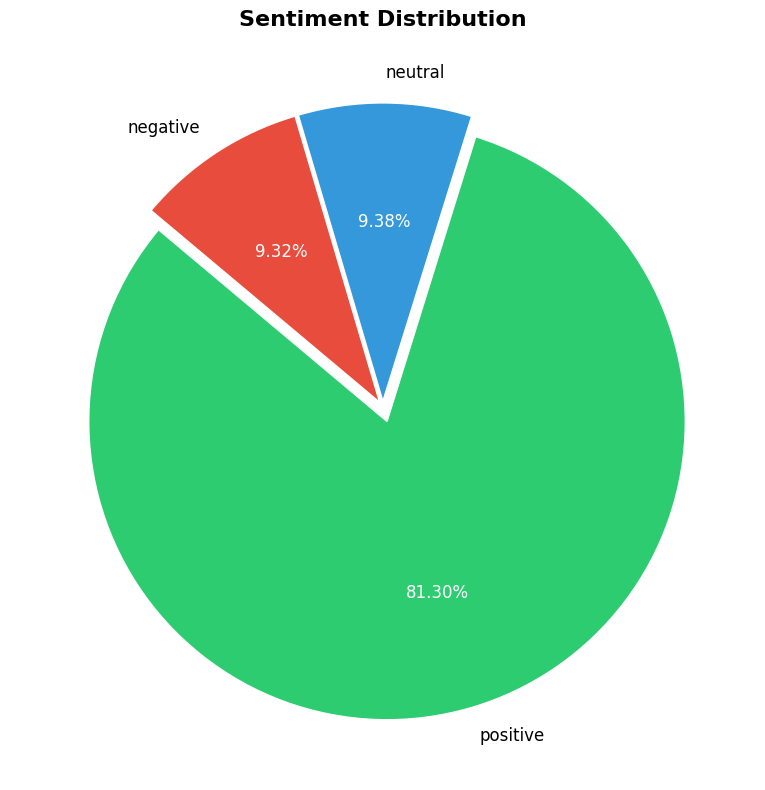

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100
colors = ['#2ecc71', '#3498db', '#e74c3c']
explode = [0.05 if i == sentiment_counts.idxmax() else 0.02 for i in sentiment_percentages.index]
plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    sentiment_percentages,
    labels=sentiment_percentages.index,
    autopct='%1.2f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)
plt.title("Sentiment Distribution", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
df.to_csv("amazon_updated.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/amazon_review.csv")

In [40]:
df.shape

(1683462, 19)

In [41]:
df.value_counts("sentiment")

,count
sentiment,
positive,1368738
neutral,157901
negative,156823


Verinin dengeli olması ve modeli zorlamaması için positive kısmının %70 ini çıkarıyoruz

In [42]:
# Positive olanların 0.3 ünü al
positive_half = df[df["sentiment"] == "positive"].sample(frac=0.3, random_state=42)

# Negative ve neutral olanların tamamını al
neutral_all = df[df["sentiment"] == "neutral"]
negative_all = df[df["sentiment"] == "negative"]


In [43]:
# Yeni DataFrame'i birleştir
df = pd.concat([positive_half, neutral_all, negative_all], ignore_index=True)

# Karışıklık olmaması için shuffle edelim
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [44]:
df.value_counts("sentiment")

,count
sentiment,
positive,410621
neutral,157901
negative,156823


## Modelling 

In [24]:
tokenizer = Tokenizer(num_words=100000, oov_token="<OOV>")
tokenizer.fit_on_texts(df["text"])

# Diziye çevir ve sabit uzunlukta padding
sequences = tokenizer.texts_to_sequences(df["text"])
padded_sequences = pad_sequences(sequences, maxlen=150, padding='post', truncating='post')


In [29]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df["sentiment"])
labels_cat = to_categorical(labels)

In [49]:

# Önce test setini ayır
X_temp, X_test, y_temp, y_test = train_test_split(
    padded_sequences, labels_cat,
    test_size=0.12, random_state=42, stratify=np.argmax(labels_cat, axis=1)
)

# Kalan veriden %10'unu validation için ayır
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.1, random_state=42, stratify=np.argmax(y_temp, axis=1)
)

#### CNN - Embedding

In [51]:
model = Sequential([
    Embedding(input_dim=100000, output_dim=256, input_length=150),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=12,
    batch_size=256,
    validation_data=(X_val, y_val),
    callbacks=[early_stop]
)

Epoch 1/12
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 279s 122ms/step - accuracy: 0.7661 - loss: 0.5503 - val_accuracy: 0.8793 - val_loss: 0.3185
Epoch 2/12
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 277s 124ms/step - accuracy: 0.8701 - loss: 0.3203 - val_accuracy: 0.8850 - val_loss: 0.2887
Epoch 3/12
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 277s 123ms/step - accuracy: 0.8896 - loss: 0.2751 - val_accuracy: 0.8839 - val_loss: 0.2816
Epoch 4/12
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 276s 123ms/step - accuracy: 0.9023 - loss: 0.2444 - val_accuracy: 0.8790 - val_loss: 0.2923
Epoch 5/12
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 274s 122ms/step - accuracy: 0.9128 - loss: 0.2193 - val_accuracy: 0.8716 - val_loss: 0.3077
Epoch 6/12
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 277s 123ms/step - accuracy: 0.9239 - loss: 0.1941 - val_accuracy: 0.8710 - val_loss: 0.3180
Epoch 7/12
2245/2245 ━━━━━━━━━━━━━━━━━━━━ 274s 122ms/step - accuracy: 0.9302 - loss: 0.1784 - val_accuracy: 0.8634 - val_loss: 0.3478


In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 256)       │    25,600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 98, 128)        │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 96, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,318,027 (294.94 MB)

 Trainable params: 25,772,675 (98.31 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 51,545,352 (196.63 MB)

#### Test Evaluation

In [55]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2721/2721 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8807 - loss: 0.2907
Test Accuracy: 0.8799


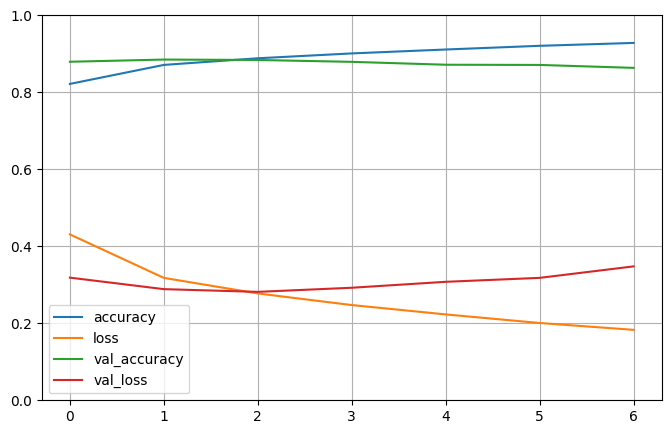

In [54]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [60]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

2721/2721 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


### Confusion Matrix

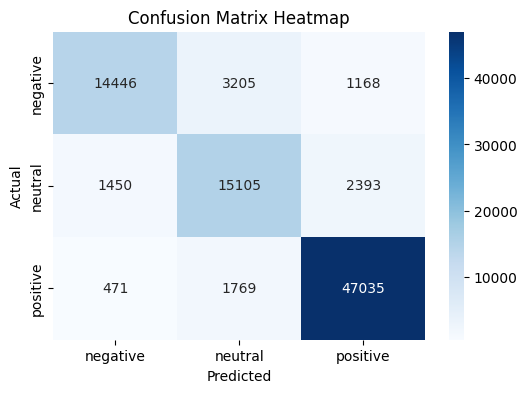

In [61]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [63]:
class_names = label_encoder.classes_

print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.88      0.77      0.82     18819
     neutral       0.75      0.80      0.77     18948
    positive       0.93      0.95      0.94     49275

    accuracy                           0.88     87042
   macro avg       0.85      0.84      0.85     87042
weighted avg       0.88      0.88      0.88     87042



In [64]:
model.save("sentiment_cnn_model.h5")

### WordCloud

In [58]:
from wordcloud import WordCloud
from PIL import Image


In [65]:
mask_image = np.array(Image.open("/content/images.png"))

In [66]:
wc_pos = WordCloud(width=800, height=800, background_color='white', mask=mask_image, contour_color='orange', contour_width=3, max_words=200, colormap='viridis').generate(" ".join(df[df["sentiment"] == "positive"]["text"]))
wc_neg = WordCloud(width=800, height=800, background_color='black', mask=mask_image, contour_color='red', contour_width=3, max_words=200, colormap='autumn').generate(" ".join(df[df["sentiment"] == "negative"]["text"]))

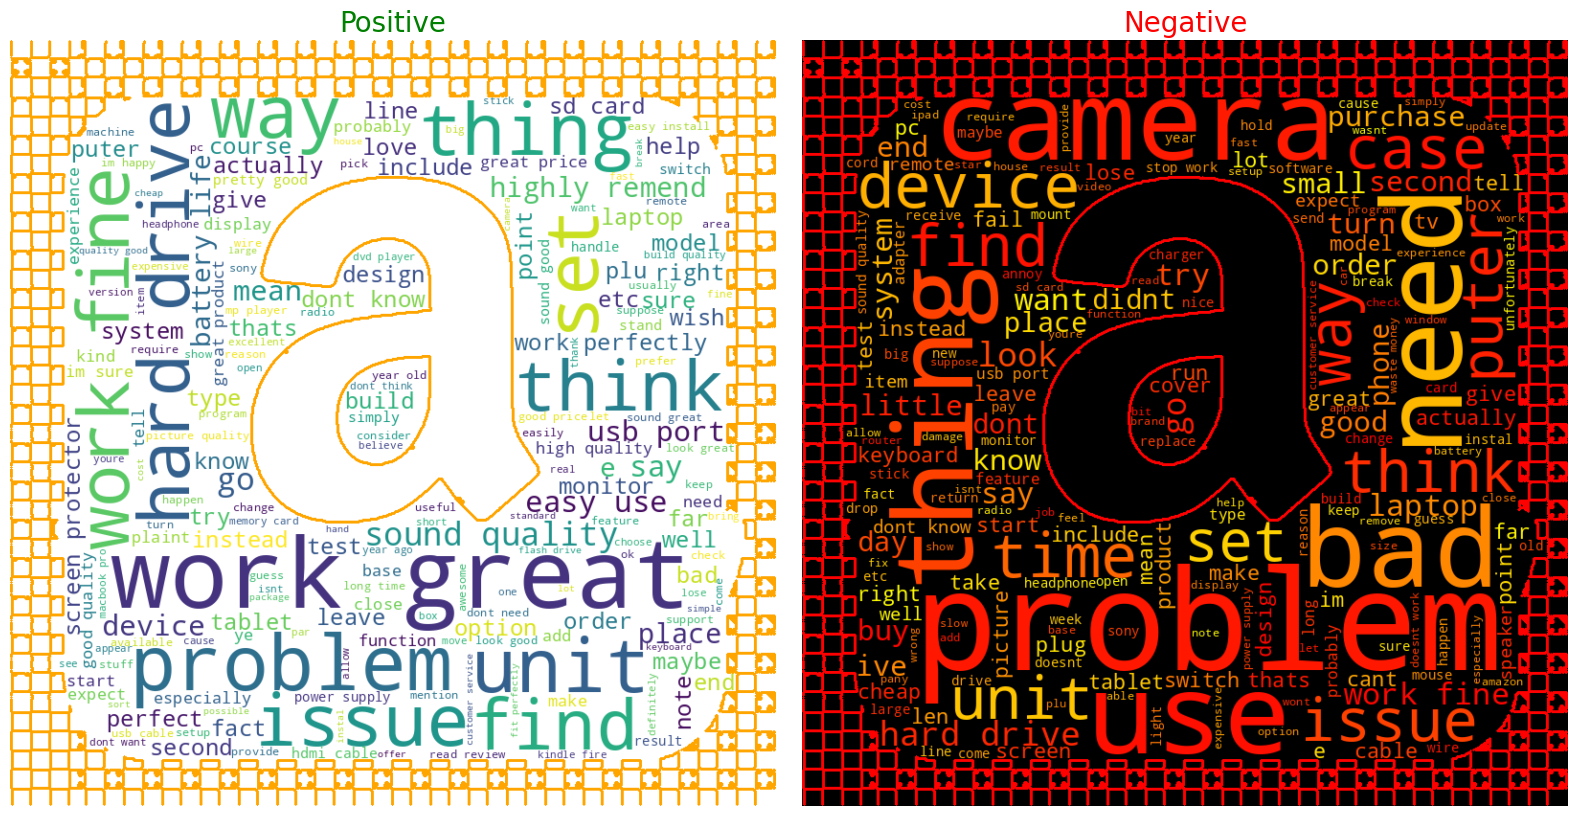

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].imshow(wc_pos, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Positive", fontsize=20, color="green")

ax[1].imshow(wc_neg, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Negative", fontsize=20, color="red")

plt.tight_layout()
plt.show()
